# <center> Исследование объявлений о продаже квартир

Необзодимо провести исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

### Загружаем данные

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv',sep ='\t', parse_dates=['first_day_exposition'])

In [3]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [4]:
data.head() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
data.info() #Выводим основную информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

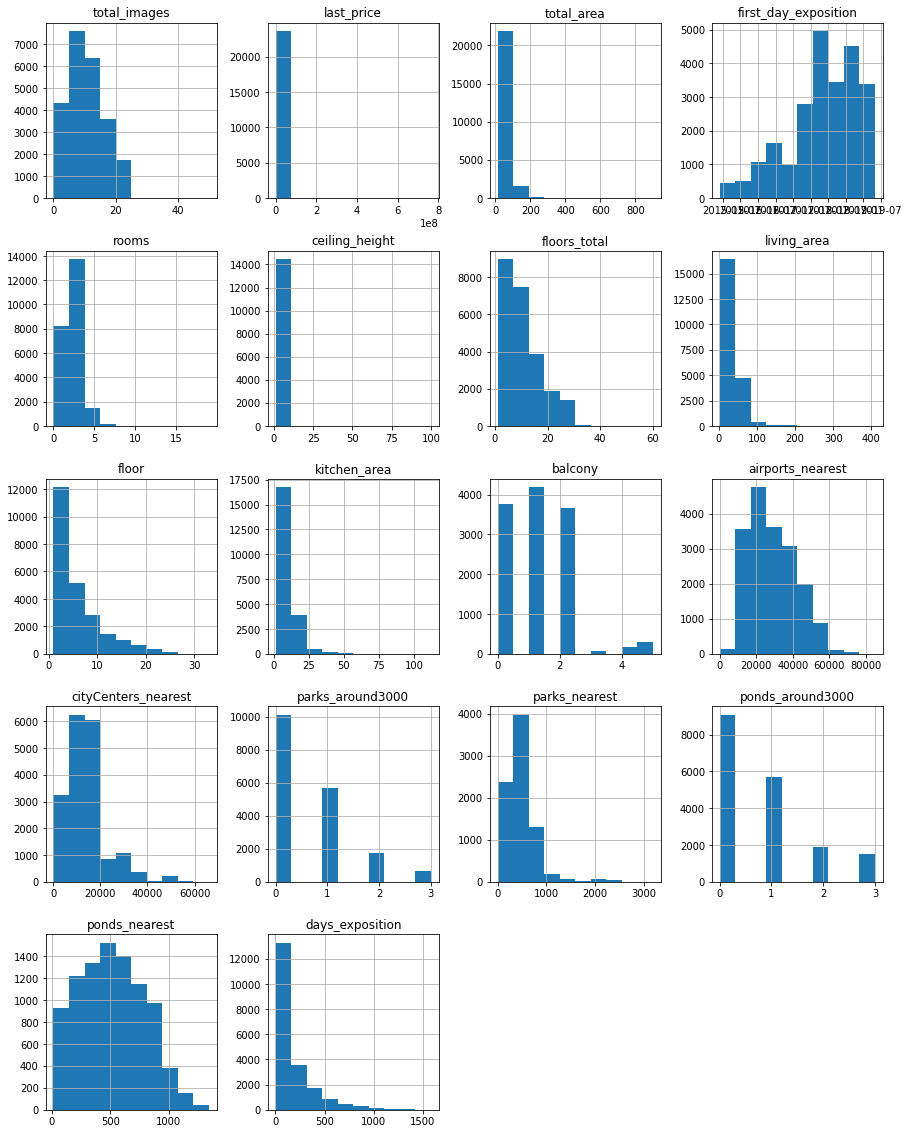

''

In [6]:
data.hist(figsize=(15, 20))
plt.show()
;

In [7]:
data.shape

(23699, 22)

Получен датасет размером 33 колонки и 23650 строки. 
- По предварительной оценке в некоторых столбцах видим явные аномалии в данных которые не дают достоверно оценить данные, например: last_price...  
- Необходимо изучить пропуски в данных, понять причину и сделать выводы например в столбце is_apartment	.
- Также требуется некоторые преобразования типов данных как например: дата ...
- Привести название столбцов в нормальный вид например: cityCenters_nearest - city_сenters_nearest


### Выполним предобработку данных

In [8]:
data.isna().sum()#Рассчитаем количество пропущенных значений для каждого столбца

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.400000
living_area,8.000000
floor,0.000000
is_apartment,88.300000


In [10]:
data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}, inplace = True )

Пропуски в столбцах: 
- "ceiling_height", "floors_total", "living_area", "locality_name" - пропуски в данных связаны с человеческим или техническим фактором 
- "kitchen_area" - пропуски могут быть связаны с отсутствием отдельной кухни, также не исключен человеческий фактор
- "is_apartment" - пропуски означают, что жилье не является апартаменты, 
- "balcony" - пропуски говорят об отсутствии балконов,
- "airports_nearest" - пропуски могут быть связаны с отсутствием аэропортов рядом с населенным пунктом
- "city_centers_nearest", "parks_nearest", "ponds_nearest" - центр города, парки и водоемы могут быть сильно удалены, в таком случае не заполнили этот пункт
- "parks_around3000" - в радиусе 3км могут отсутствовать парки, 
- "ponds_around3000" - в радиусе 3км могут отсутствовать водоемы
- "days_exposition" - жилте еще не продано, с чем и свзаны пропуски в этом столбце


In [11]:
data.dtypes #Выведем типы данных в столбцах

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                    object
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

Изменение типов данных в столбцах:

    - "first_day_exposition" - дата публикации, есть специальный тип данных для обозначения даты
    - "is_apartment" - является ли жилье апартаментами, для анализа лучше изменить тип данных на bool, (пропуски будут означать False)
    - "balcony" - изменим тип данных, количество баконов - это целое число изменим тип на int64, пропуски заменим на 0
    - "days_exposition" - число дней размещения, целое число , преобразуем данные в int64

In [12]:
#Преобразуем формат даты
# data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'].head(5)

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

In [13]:
# Заполним пропуски в столбце высота потолков медианным знаечением 
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [14]:
# Удалим пустые строки так как их мало, на результат это не повлияет
data.dropna(subset=['floors_total'],inplace=True)
data['floors_total'].isna().sum()

0

In [15]:
# Заменим пропуски на False, что будет означать что жилье не является апартаментами
data['is_apartment'] = data['is_apartment'].fillna(False)
# Заменяем тип данных на "bool"
data['is_apartment'] = data['is_apartment'].astype(bool)
data['is_apartment'].unique()

array([False,  True])

In [16]:
# Предположим, что пустые значения в площади кухни, говорят об отсутствии отдельной кухни
# Заменим пустые значения на 0
data['kitchen_area'] = data['kitchen_area'].fillna(0)
data['kitchen_area'].sort_values(ascending=False)

19540    112.0
20215    107.0
2489     100.7
5358     100.0
16239     93.2
         ...  
16717      0.0
4793       0.0
1769       0.0
20395      0.0
21675      0.0
Name: kitchen_area, Length: 23613, dtype: float64

In [17]:
# Предположим, что пустые значения в количестве балконов, говорит об отсутствии балкона
# Заменим пустые значения на 0
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype(int)
data['balcony'].unique()


array([0, 2, 1, 5, 4, 3])

In [18]:
# перевод в строчные буквы
#data['locality_name'] = data['locality_name'].str.lower()

# Оставим только названия
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё','е')
    .replace(['платформа ', 'садоводческое некоммерческое товарищество ','поселок ',
             'садовое товарищество ', 'станции ', 'село ','при железнодорожной станции ', 'пансионат ', 'городского типа ',
             'деревня ', 'городской поселок ','городской ', 'при железнодорожной ','коттеджный '], '', regex=True)
)
# Уникальные значения в алфавитном порядке
set(data['locality_name'].unique())


{nan,
 'Агалатово',
 'Александровская',
 'Алексеевка',
 'Аннино',
 'Аро',
 'Барышево',
 'Батово',
 'Бегуницы',
 'Белогорка',
 'Белоостров',
 'Бокситогорск',
 'Большая Вруда',
 'Большая Ижора',
 'Большая Пустомержа',
 'Большие Колпаны',
 'Большое Рейзино',
 'Большой Сабск',
 'Бор',
 'Борисова Грива',
 'Бугры',
 'Будогощь',
 'Ваганово',
 'Важины',
 'Вартемяги',
 'Вахнова Кара',
 'Вещево',
 'Виллози',
 'Вознесенье',
 'Возрождение',
 'Войсковицы',
 'Войскорово',
 'Володарское',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Вырица',
 'Выскатка',
 'Высокоключевой',
 'Высоцк',
 'Гаврилово',
 'Гарболово',
 'Гатчина',
 'Гладкое',
 'Глажево',
 'Глебычево',
 'Глинка',
 'Гончарово',
 'Горбунки',
 'Гостилицы',
 'Громово',
 'Дзержинского',
 'Дружная Горка',
 'Дружноселье',
 'Дубровка',
 'Елизаветино',
 'Ефимовский',
 'Жилгородок',
 'Жилпоселок',
 'Житково',
 'Заводской',
 'Заклинье',
 'Заневка',
 'Запорожское',
 'Зеленогорск',
 'Зимитицы',
 'Ивангород',
 'Извара',
 'Ильичево',
 'Иссад',
 'Кали

В столбце 'locality_name' явных дубликатов не найдено

In [19]:
# Количество пропусков в названии населенных пунктов
data['locality_name'].isna().sum()

48

In [20]:
# Удалим пустые строки в locality_name
data.dropna(subset=['locality_name'],inplace=True)
data['locality_name'].isna().sum()

0

In [21]:
# подсчёт явных дубликатов
data.duplicated().sum()

0

Явных дубликатов не найдено! 

In [22]:
# явных дубликатов не найдено
# data = data.drop_duplicates().reset_index(drop=True)
# data

In [23]:
# Пропуски означают отсутствие парков в радиусе 3км, заменим на 0 и преобразуем в целые числа
# data['parks_around3000'] = data['parks_around3000'].fillna(0)
# data['parks_around3000'] = data['parks_around3000'].astype(int)

In [24]:
# Пропуски означают отсутствие водоемов в радиусе 3км, заменим на 0 и преобразуем в целые числа
# data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
# data['ponds_around3000'] = data['ponds_around3000'].astype(int)

In [25]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

Причинами пропусков могли стать:
- Случайность
- Человеческий фактор.
- Технические сбои.
- Отсутствие параметра у жилья

*Вывод*

В процессе предобработки данных:
- Переименовали название столбца cityCenters_nearest на city_centers_nearest.
- Изменили тип данных, в соответствии с данными находяшимися в столбцах.
- Заполнили пустые значения там где это возможно
- проанализировали стобцы в которых возможны явные и неявные дубликаты и убедились в их отсутствии

**Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:**



### Добавим новые столбцы

In [26]:
# посчитаем цену квадратного метра
data['price_square_meter'] = data['last_price'] / data['total_area']
data['price_square_meter'].head(5)

0    120370.370370
1     82920.792079
2     92785.714286
3    408176.100629
4    100000.000000
Name: price_square_meter, dtype: float64

In [27]:
# для удобства просмотра приведем к типу int
data['price_square_meter'] = data['price_square_meter'].astype('int')
data['price_square_meter'].head(5)

0    120370
1     82920
2     92785
3    408176
4    100000
Name: price_square_meter, dtype: int64

In [28]:
#Функция метки дня недели
def weekday_type(row):
    if row['weekday']==0:
        return 'понедельник'
    if row['weekday']==1:
        return 'вторник'
    if row['weekday']==2:
        return 'среда'
    if row['weekday']==3:
        return 'четверг'
    if row['weekday']==4:
        return 'пятница'
    if row['weekday']==5:
        return 'суббота'
    if row['weekday']==6:
        return 'воскресенье'
    return "Ошибка"

# создаю столбец дня недели
data['weekday'] = data['first_day_exposition'].dt.weekday
data['weekday_name'] = data.apply(weekday_type, axis=1)
data['weekday_name'].unique()

array(['четверг', 'вторник', 'пятница', 'понедельник', 'среда',
       'воскресенье', 'суббота'], dtype=object)

In [29]:
#Функция метки для месяца
def month_type(row):
    if row['month']==1:
        return "Январь"
    if row['month']==2:
        return "Февраль"
    if row['month']==3:
        return "Март"
    if row['month']==4:
        return "Апрель"
    if row['month']==5:
        return "Май"
    if row['month']==6:
        return "Июнь"
    if row['month']==7:
        return "Июль"
    if row['month']==8:
        return "Август"
    if row['month']==9:
        return "Сентябрь"
    if row['month']==10:
        return "Октябрь"
    if row['month']==11:
        return "Ноябрь"
    if row['month']==12:
        return "Декабрь"
    return 'Ошибка'
# создаю столбец месяца
data['month'] = data['first_day_exposition'].dt.month
data['month_name'] = data.apply(month_type, axis=1)
data['month_name'].unique()

array(['Март', 'Декабрь', 'Август', 'Июль', 'Июнь', 'Сентябрь', 'Ноябрь',
       'Апрель', 'Май', 'Февраль', 'Январь', 'Октябрь'], dtype=object)

In [30]:
# создаю столбец года
data['year'] = data['first_day_exposition'].dt.year
data['year'].head(5)

0    2019
1    2018
2    2015
3    2015
4    2018
Name: year, dtype: int64

In [31]:
# учтем фактор первого и последнего этажа, для этого разделим на 3 категории
def category_fl(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'


In [32]:
# преобразуем этаж в категорию 
data['floor_category'] = data.apply(category_fl, axis = 1)
data['floor_category'].head(5)

0    другой
1    первый
2    другой
3    другой
4    другой
Name: floor_category, dtype: object

In [33]:
# добавим столбец соотношения жилой площади к общей
data['useful_area_ratio'] = data['living_area'] / data['total_area']
data['useful_area_ratio'].head(5)

0    0.472222
1    0.460396
2    0.612500
3         NaN
4    0.320000
Name: useful_area_ratio, dtype: float64

In [34]:
# добавим столбец отношения площади кухни к общей
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']
data['kitchen_area_ratio'].head(5)

0    0.231481
1    0.272277
2    0.148214
3    0.000000
4    0.410000
Name: kitchen_area_ratio, dtype: float64

In [35]:
# Посчитаем расстояние до центра города в км
data['distance_city_center'] = data['city_centers_nearest']/1000
data['distance_city_center'].head(5)

0    16.028
1    18.603
2    13.933
3     6.800
4     8.098
Name: distance_city_center, dtype: float64

### Проведите исследовательский анализ данных

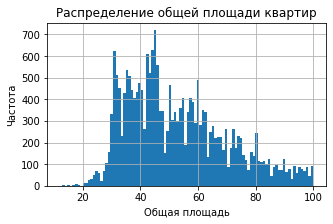

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

''

In [36]:
data['total_area'].plot(y = 'total_area',bins = 100,kind='hist', grid=True, figsize = (5,3),range=(12,100))
plt.title('Распределение общей площади квартир')
plt.xlabel('Общая площадь')
plt.ylabel('Частота')
plt.show()
display(data['total_area'].describe())
;

Вывод:
- Наибольшее количество квартир на рынке, составляют квартиры с площадью от 45-50 квадратных метров

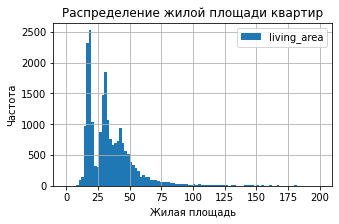

count    21700.000000
mean        34.454793
std         22.048172
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        410.000000
Name: living_area, dtype: float64

''

In [37]:
data['living_area'] = data['living_area'].round(0)
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3),range=(0,200))
plt.title('Распределение жилой площади квартир')
plt.xlabel('Жилая площадь')
plt.ylabel('Частота')
plt.show()
display(data['living_area'].describe())
;

Вывод:
- Видим 2 моды, больше всего квартир в продаже с жилой площадью 15-20 кв.м и 27-32 кв.м

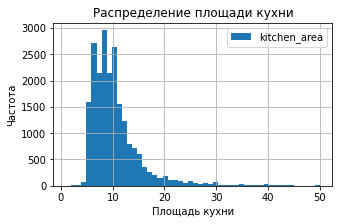

count    23565.000000
mean         9.340505
std          6.383369
min          0.000000
25%          6.000000
50%          9.000000
75%         11.000000
max        112.000000
Name: kitchen_area, dtype: float64

''

In [38]:
data['kitchen_area'] = data['kitchen_area'].astype("int")
data.plot(y = 'kitchen_area', kind = 'hist', bins = 50, grid=True, figsize = (5,3),range=(1,50))
plt.title('Распределение площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Частота')
plt.show()
display(data['kitchen_area'].describe())
;

Больше всего предложений с площадью кухни в 7-10 метров

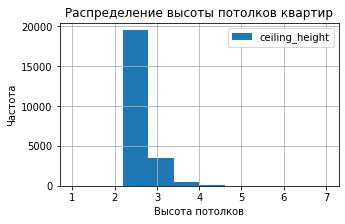

count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

''

In [39]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 10, range = (1,7), grid=True, figsize = (5,3))
plt.title('Распределение высоты потолков квартир')
plt.xlabel('Высота потолков')
plt.ylabel('Частота')
plt.show()
display(data['ceiling_height'].describe())
;

In [40]:
data.loc[data['ceiling_height'] > 5, 'ceiling_height'] = data['ceiling_height'].median()
data.query('ceiling_height>5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_square_meter,weekday,weekday_name,month,month_name,year,floor_category,useful_area_ratio,kitchen_area_ratio,distance_city_center


In [41]:
display(data['ceiling_height'].describe())

count    23565.000000
mean         2.695886
std          0.216363
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

В большинстве квартир высота потолков укладывается в интервал от 2-3м, стандартные 1-2-3 комнатные квартиры
Значения высоты потолков выше 5 метров считаем явными ошибками, поэтому заменим их на медианную высоту потолков, таких данных немного


In [42]:
# Код ревьюера
data['ceiling_height'].sort_values().unique()

array([1.  , 1.2 , 1.75, 2.  , 2.2 , 2.25, 2.3 , 2.34, 2.4 , 2.45, 2.46,
       2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57,
       2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68,
       2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79,
       2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9 ,
       2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.  , 3.01,
       3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1 , 3.11, 3.12,
       3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2 , 3.21, 3.22, 3.23, 3.24,
       3.25, 3.26, 3.27, 3.28, 3.29, 3.3 , 3.31, 3.32, 3.33, 3.34, 3.35,
       3.36, 3.37, 3.38, 3.39, 3.4 , 3.42, 3.43, 3.44, 3.45, 3.46, 3.47,
       3.48, 3.49, 3.5 , 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58,
       3.59, 3.6 , 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7 , 3.75,
       3.76, 3.78, 3.8 , 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9 ,
       3.93, 3.95, 3.98, 4.  , 4.06, 4.1 , 4.14, 4.

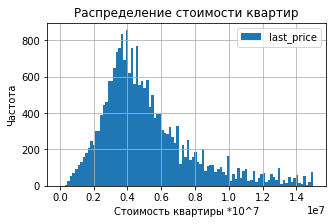

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

''

In [43]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (5,3))
plt.title('Распределение стоимости квартир')
plt.xlabel('Стоимость квартиры *10^7')
plt.ylabel('Частота')
plt.show()
display(data['last_price'].describe())
;
# значения выводятся в экспоненциальной записи чисел

Больше всего квартир стоимостью 4-6 млн, примерно столько стоят квартиры 1-2 комнатные , которых больше всего на рынке

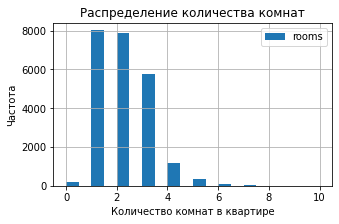

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

''

In [44]:
data.plot(y = 'rooms', kind = 'hist', bins = 20, grid=True, figsize = (5,3), range = (0,10))
plt.title('Распределение количества комнат')
plt.xlabel('Количество комнат в квартире')
plt.ylabel('Частота')
plt.show()
display(data['rooms'].describe())
;

Чаще остальных продаются 1-2-3 комнатные квартиры, скорее всего это связано с тем , что их больше всего на рынке, очень мало в продаже студий и многокомнатных квартир

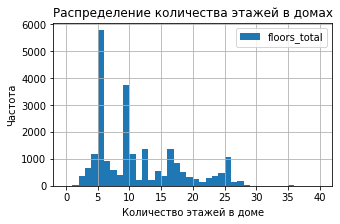

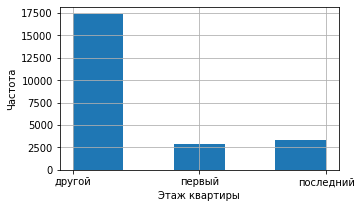

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

''

In [45]:
data.plot(y = 'floors_total', kind = 'hist', bins = 40, grid=True, figsize = (5,3), range = (0,40))
plt.title('Распределение количества этажей в домах')
plt.xlabel('Количество этажей в доме')
plt.ylabel('Частота')
plt.show()
data['floor_category'].hist(  bins = 5, grid=True, figsize = (5,3))
plt.xlabel('Этаж квартиры')
plt.ylabel('Частота')
plt.show()
display(data['floors_total'].describe())
;

В продаже много квартир из  5-6 этажных и 9-10 этажных домов.

На втором графике видно распределение по категориям этажей , большая часть квартир находятся не на первом и не на последнем этаже, между собой  они сопоставимы по количеству предложений на рынке

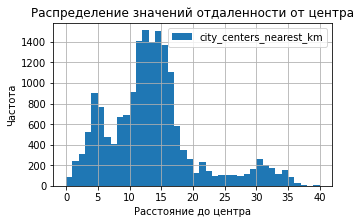

count    18064.000000
mean        14.192656
std          8.613348
min          0.181000
25%          9.238000
50%         13.096500
75%         16.285000
max         65.968000
Name: city_centers_nearest_km, dtype: float64

''

In [46]:
data['city_centers_nearest_km'] = data['city_centers_nearest']/1000
data.plot(y = 'city_centers_nearest_km', kind = 'hist', bins = 40, grid=True, figsize = (5,3), range = (0,40))
plt.title('Распределение значений отдаленности от центра')
plt.xlabel('Расстояние до центра')
plt.ylabel('Частота')
plt.show()
display(data['city_centers_nearest_km'].describe())
;

По графику видем, что большинство квартир в продаже находятся примерно в 15 км от центра, квартир которые ближе к центру больше чем тех которые дальше, говорит также о том , что в городе больше жилья и больше продается 

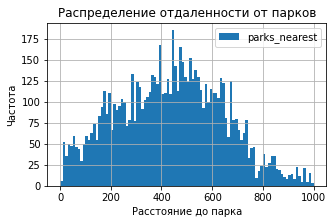

count    8030.000000
mean      490.580448
std       341.572956
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

''

In [47]:
data.plot(y = 'parks_nearest', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,1000))
plt.title('Распределение отдаленности от парков')
plt.xlabel('Расстояние до парка')
plt.ylabel('Частота')
plt.show()
display(data['parks_nearest'].describe())
;

Вывод:

- Общая площадь в нашей выборке колеблется от 12 до 100 м2, среднее значение 60, а медиана 52 м2. Распределение данных Гаусса.
- Цены на недвижимость имеют среднее значение в 6,5 млн руб., медиана 4,6 млн руб. Распределение данных Гаусса.
- Количество комнат колеблется от 1 до 10. Больше всего однокомнатных квартир.
- Высота потолков в среднем составляет 2,77 м, медиана 2,65 м.
- Больше всего предложений о продаже квартир в пятиэтажных домах, а потом в девятиэтажках.
- Больше всего предложений о продаже в спальных районах на окраинах города (на расстоянии 12000 -15000 метров)), и значительным всплеском на расстоянии в 5000 метров от центра города.

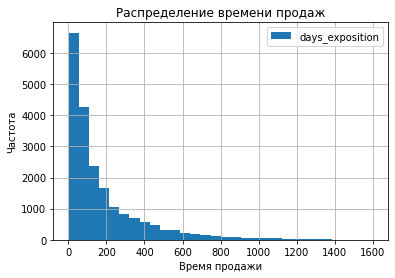

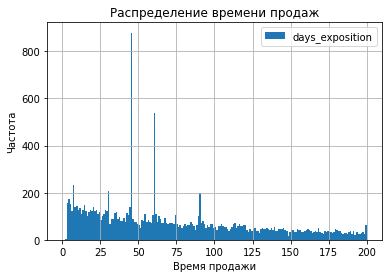

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

''

In [48]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
plt.title('Распределение времени продаж')
plt.xlabel('Время продажи')
plt.ylabel('Частота')
data.plot(y = 'days_exposition', kind = 'hist', bins = 200, grid = True, range = (0,200))
plt.title('Распределение времени продаж')
plt.xlabel('Время продажи')
plt.ylabel('Частота')
plt.show()
#среднее значение, медиана и межквартильный размах
display(data[data['days_exposition']!=0]['days_exposition'].describe())
;

Вывод

Среднее время продажи составляет 180 дней, при этом медианное значение составляет 95 дней, оно более точно характеризует среднее время продажи, так как не зависит от выбрасов и нестандартных значений.
В среднем продажа квартиры занимает 3 месяца в зависимости от площади, цены, удалённости от центра.
45 дней - первый квартиль времени продаж - все значения до Q1 можно считать быстрыми продажами, а самые долгие продажи после Q3- 231 дня (3 квартиль)

**Изучим зависимость цены last_price от столбцов с числовыми данными при помощи вычисления корреляции:**

- общая площадь; 
- жилая площадь;
- площадь кухни;
- количество комнат;
- тип этажа, на котором расположена квартира (первый, последний, другой);
- дата размещения (день недели, месяц, год).

In [49]:
data['last_price'].describe()
;

''

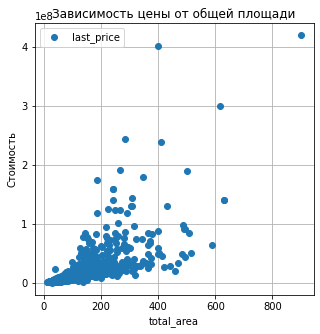

0.6536213939252808

''

In [50]:
(
    data.pivot_table(index='total_area', values='last_price',aggfunc='median')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.title('Зависимость цены от общей площади')
plt.ylabel('Стоимость')
plt.show()
display(data['total_area'].corr(data['last_price']))
;

Вывод
- Видим что наблюдается прямая связь стоимости и площади квартиры, что логично, чем больше квартира тем она дорпоже

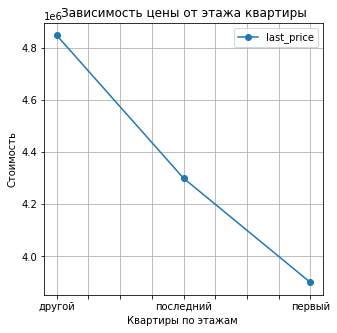

''

In [51]:
(
    data.pivot_table(index='floor_category', values='last_price', aggfunc='median').sort_values(by='last_price', ascending=False)
    .plot(grid=True, style='o-', figsize=(5, 5), title='Зависимость цены от этажа квартиры')
)
plt.xlabel('Квартиры по этажам ')
plt.ylabel('Цена')
plt.ylabel('Стоимость')
plt.show()
;

Вывод

Cамые дешевые квартиры на первом этаже, на последнем чуть лучше обстоятельства, связано это скорее всего с фактором шума, уровнем окон, на последнем этаже обычно сверху крыша и тоже могут возникать непредвиденные факторы, но вид из окна немного улучшает ситуацию относительно первого

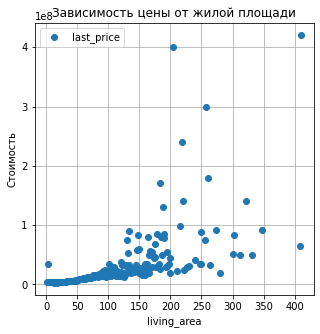

0.566314684062101

''

In [52]:
(
    data.pivot_table(index='living_area', values='last_price',aggfunc='median')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.title('Зависимость цены от жилой площади')
plt.ylabel('Стоимость')
plt.show()

display(data['living_area'].corr(data['last_price']))
;

Вывод
- Также наблюдается прямая связь стоимости и жилой площадью квартиры, что логично, чем больше жилая площать тем больше квартира, тем она дорпоже

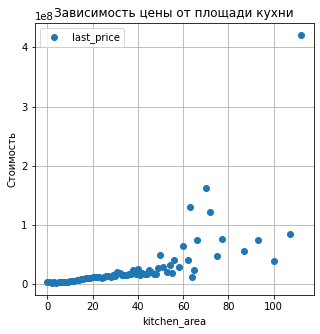

0.3896303871448869

''

In [53]:
(
    data.pivot_table(index='kitchen_area', values='last_price',aggfunc='median')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.title('Зависимость цены от площади кухни')

plt.ylabel('Стоимость')
plt.show()
display(data['kitchen_area'].corr(data['last_price']))
;

Вывод
-  В данном случае связь между площадью кухни и ценой квартиры менее явная но, она все же есть, скорее всего проблема с тем, что не во всех маленьких квартирах есть отдельная кухня 

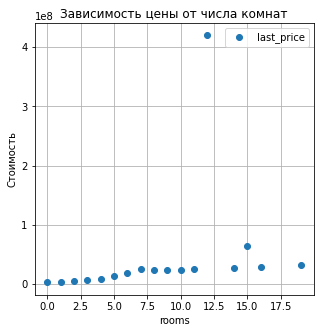

0.3631905485065752

''

In [54]:
(
    data.pivot_table(index='rooms', values='last_price',aggfunc='median')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.title('Зависимость цены от числа комнат')
plt.ylabel('Стоимость')
plt.show()

display(data['rooms'].corr(data['last_price']))
;

In [55]:
data.pivot_table(index='rooms', values='last_price', aggfunc=['count','median'])

,count,median
,last_price,last_price
rooms,,
0,194,2700000.0
1,8004,3600000.0
2,7897,4768714.0
3,5779,6200000.0
4,1172,9000000.0
5,325,14000000.0
6,104,19000000.0
7,59,24900000.0


Вывод 
- Корреляция очень слабая, связано это с тем, что большая часть квартир в нашей выборке имеют 1-2-3 комнаты, тоесть мало данных по многокомнатным квартирам, что не дает получить значительную корреляцию. Чем больше комнат , тем обычно больше квартира , соответственно больше и цена

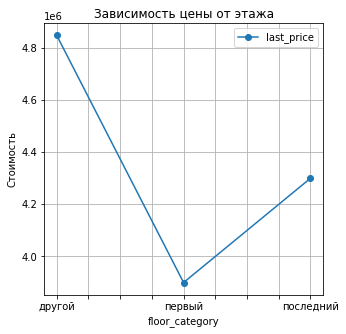

''

In [56]:
(
    data.pivot_table(index='floor_category', values='last_price',aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от этажа')
plt.ylabel('Стоимость')
plt.show()
;


Графиком подтверждаем наш вывод о том, что на цену влияет только если квартира расположена на первом этаже или последнем, цена квартиры ниже всего на 1ом этаже, чуть дороже последний этаж

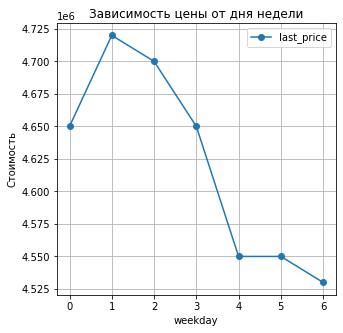

''

In [57]:
(
    data.pivot_table(index='weekday', values='last_price',aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от дня недели')
plt.ylabel('Стоимость')
plt.show()
;

Дороже всего продаются квартиры размещенные во вт и дальше идет убывание стоимости, 

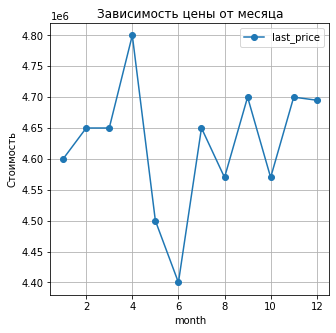

''

In [58]:
(
    data.pivot_table(index='month', values='last_price',aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от месяца')
plt.ylabel('Стоимость')
plt.show()
;

Дороже всего покупают квартиры выставленные в апреле, в июне стоимость квартир падает, возможно это связано с спросом, в остальные месяци спрос примерно одинаковый, и цена продажи соответственно тоже

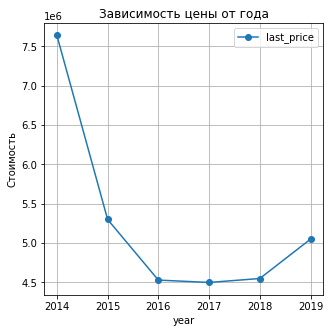

''

In [59]:
(
    data.pivot_table(index='year', values='last_price',aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от года')
plt.ylabel('Стоимость')
plt.show()
;

In [60]:
data.pivot_table(index='year', values=['last_price','total_area','rooms'], aggfunc=['count','median'])

count                      median                 
     last_price rooms total_area last_price rooms total_area
year                                                        
2014        136   136        136  7640000.0     3      76.18
2015       1166  1166       1166  5300500.0     2      60.00
2016       2745  2745       2745  4530000.0     2      53.10
2017       8161  8161       8161  4500000.0     2      52.00
2018       8486  8486       8486  4550000.0     2      50.50
2019       2871  2871       2871  5050000.0     2      52.00

На графике видно, что дороже всего проданы квартиры размещенные в 2014 году, но если посмотреть на статистику, то видно, что в этот год продаж меньше всего, и проданные квартиры имеют больше комнат и большую площадь по медиане.


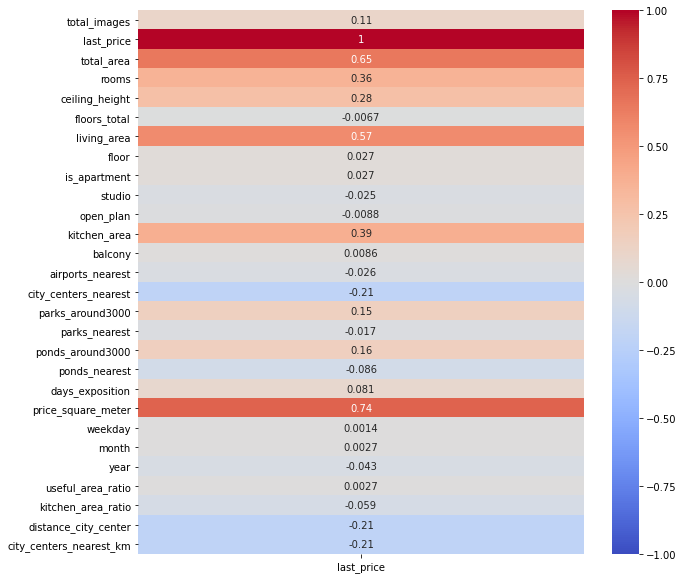

''

In [61]:
import seaborn as sns
import numpy as np
plt.figure(figsize=(10,10))
upp_mat = np.triu(data.corr())
sns.heatmap(data.corr()[['last_price']], vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')
plt.show()
;

 Для наглядности построил тепловую карту, наибольшее влияние на цену жилья оказывает площадь (общая площадь, жилая площадь и площадь кухни), далее идет количество комнат все параметры вытекающие из большой площади.

**Проанализируем объявления в разрезе населенных пунктов**

In [62]:
data['locality_name'].value_counts().head(10)  

Санкт-Петербург    15651
Мурино               586
Кудрово              470
Шушары               439
Всеволожск           398
Пушкин               369
Колпино              338
Парголово            327
Гатчина              307
Выборг               237
Name: locality_name, dtype: int64

In [63]:
local_ten_data = data[data.locality_name.isin(data.locality_name.value_counts().index[:10])]
local_ten_data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,weekday,weekday_name,month,month_name,year,floor_category,useful_area_ratio,kitchen_area_ratio,distance_city_center,city_centers_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,3,четверг,3,Март,2019,другой,0.472222,0.231481,16.028,16.028
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,19.0,1,False,...,1,вторник,12,Декабрь,2018,первый,0.460396,0.272277,18.603,18.603
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.0,4,False,...,3,четверг,8,Август,2015,другой,0.612500,0.148214,13.933,13.933
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,NaN,9,False,...,4,пятница,7,Июль,2015,другой,NaN,0.000000,6.800,6.800
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,1,вторник,6,Июнь,2018,другой,0.320000,0.410000,8.098,8.098
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,11.0,6,False,...,3,четверг,11,Ноябрь,2017,другой,0.284182,0.386059,19.143,19.143
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,NaN,22,False,...,3,четверг,4,Апрель,2019,другой,NaN,0.263966,11.634,11.634
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.0,26,False,...,2,среда,5,Май,2018,другой,0.465320,0.265682,NaN,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,44.0,7,False,...,6,воскресенье,2,Февраль,2017,другой,0.714754,0.106557,15.008,15.008
10,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.0,3,False,...,3,четверг,11,Ноябрь,2017,другой,0.512626,0.214646,13.878,13.878


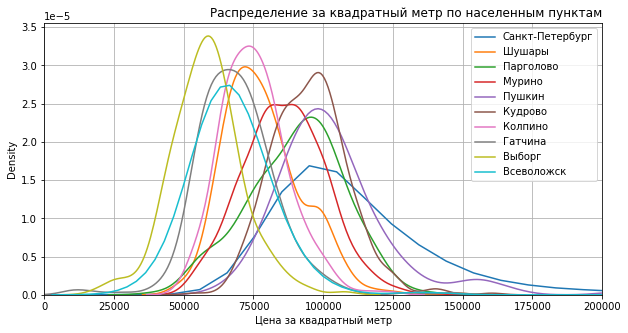

In [64]:
fig, ax = plt.subplots(figsize=(10, 5)) 

for local in local_ten_data.locality_name.unique():
    sns.kdeplot(local_ten_data[local_ten_data.locality_name == local].price_square_meter, label = local)

plt.grid(True) # сетка
plt.legend(bbox_to_anchor = (1,1)) # положение легенды
plt.title('Распределение за квадратный метр по населенным пунктам', loc = 'right') # название графика
plt.xlabel('Цена за квадратный метр') # подпись оси x
plt.xlim((0,200000)) # ограничение значений оси X
plt.show()


In [65]:
display(local_ten_data.pivot_table(index='locality_name', values='price_square_meter',  aggfunc='median')
        .sort_values(by='price_square_meter')
        .round(2))

,price_square_meter
locality_name,
Выборг,58158.0
Всеволожск,65789.0
Гатчина,67796.0
Колпино,74723.5
Шушары,76829.0
Мурино,86249.5
Парголово,91642.0
Кудрово,95555.0
Пушкин,100000.0


Гатчина и Всеволожск - города с самой низкой средней ценой за квадратный метр (порядка 66 000 - 68 000 рублей), самая высокая цена, впрочем, ожидаемо - в Санкт-Петербурге (104 761 руб.).

In [66]:
data['locality_name']

0        Санкт-Петербург
1                 Шушары
2        Санкт-Петербург
3        Санкт-Петербург
4        Санкт-Петербург
              ...       
23694    Санкт-Петербург
23695              Тосно
23696        Рождествено
23697    Санкт-Петербург
23698        Новый Учхоз
Name: locality_name, Length: 23565, dtype: object

**Проанализируем предложения жилья в Санкт-Петербурге**


In [67]:
# выделяем квартиры в Санкт_Петербурге
# cоздаем столбец с расстоянием до центра в километрах: округляем до целых значений. 
data['city_centers_nearest_km'] = data['city_centers_nearest'].div(1000).fillna(0).apply(np.ceil)
spb_data = data[data['locality_name'] == 'Санкт-Петербург']
spb_data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,weekday,weekday_name,month,month_name,year,floor_category,useful_area_ratio,kitchen_area_ratio,distance_city_center,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,3,четверг,3,Март,2019,другой,0.472222,0.231481,16.028,17.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.0,4,False,...,3,четверг,8,Август,2015,другой,0.612500,0.148214,13.933,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,...,4,пятница,7,Июль,2015,другой,NaN,0.000000,6.800,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1,вторник,6,Июнь,2018,другой,0.320000,0.410000,8.098,9.0
7,5,7915000.0,71.6,2019-04-18,2,2.65,24.0,NaN,22,False,...,3,четверг,4,Апрель,2019,другой,NaN,0.263966,11.634,12.0
9,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,44.0,7,False,...,6,воскресенье,2,Февраль,2017,другой,0.714754,0.106557,15.008,16.0
10,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.0,3,False,...,3,четверг,11,Ноябрь,2017,другой,0.512626,0.214646,13.878,14.0
15,16,4650000.0,39.0,2017-11-18,1,2.65,14.0,20.0,5,False,...,5,суббота,11,Ноябрь,2017,другой,0.525641,0.194872,14.259,15.0
16,11,6700000.0,82.0,2017-11-23,3,3.05,5.0,56.0,1,False,...,3,четверг,11,Ноябрь,2017,первый,0.678049,0.109756,10.698,11.0
17,6,4180000.0,36.0,2016-09-09,1,2.65,17.0,16.0,7,False,...,4,пятница,9,Сентябрь,2016,другой,0.458333,0.305556,14.616,15.0


,price_square_meter
city_centers_nearest_km,
0.0,131073.5
1.0,138536.5
2.0,123966.0
3.0,116363.0
4.0,110079.5
5.0,125980.0
6.0,125920.0
7.0,134117.0
8.0,125000.0


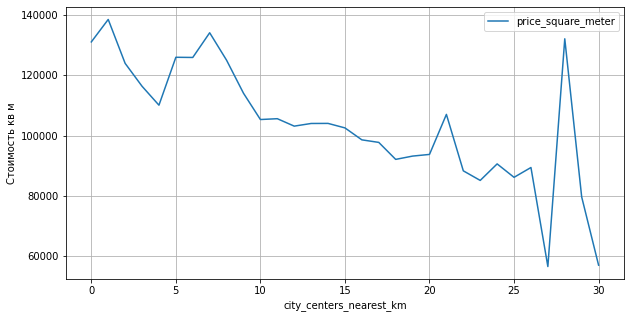

''

In [68]:
spb_data_pivot = spb_data.pivot_table(index = 'city_centers_nearest_km', values= 'price_square_meter', aggfunc='median')
display(spb_data_pivot.head(15))
spb_data_pivot.plot(figsize=(10,5), grid=True)
plt.ylabel('Стоимость кв м')
plt.show()
;

Проанализируем стоимость кв метра в зависимости от расстояния от центра ,
- 0-1 км стоимость сопоставима и самая высокая, что логично, близкая цена в 7 км, 
- 2 км также цена близка к первым двум значениям 
- 3-4 и 9 км самые низкие цены
- 5-8 цены близки с самыми высокими
- после 9 км цены ниже 
Цена уменьшается в зависимости от удаленности от центра, хоть и имеются некоторые скачки на графике.
связано скорее всего с тем что на отдалении меньше предложений, 

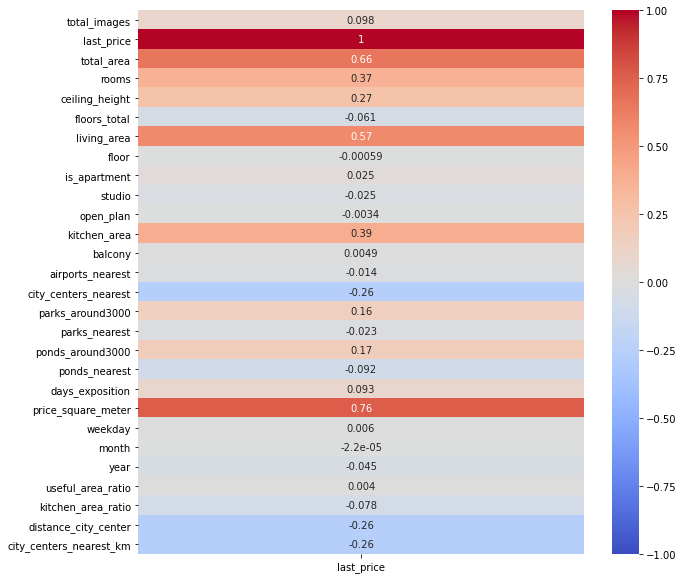

''

In [69]:
plt.figure(figsize=(10,10))  # строим тепловую карту коррелияции 
upp_mat = np.triu(spb_data.corr())
sns.heatmap(spb_data.corr()[['last_price']], vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')
plt.show()
;

По сравнениню в общим датасетом, можно выделить следующие особенности приоритетности параметров, влияющих на стоимость жилья в центре Санкт-Птеребурга:

- Площадь квартиры наиболее влиябщий на стоимость фактор;
- повышается внимание к высоте потолков и количеству комнат;
- площадь кухни имеет меньшую корелляцию с итоговой стоимостью;
- выше корреляция кв метра с общей стоимостью

# **Вывод**

Проанализировав данные объявлений рынка недвижимости можно сделать следующие выводы.

Основными факторами влияющими на цену жилья являются:

- общая площадь;
- соотношение площади кухни и жилой площади к общей;
- количество комнат;
- высота потолка;
- этаж (первый, последний, другой);
- наличие парка в радиусе 3-х км.

При изучении объявлений о продаже жилья в центре Санкт-Птербурга факторы  влияющие на стоимость практически такие же:

- общая площадь;
- соотношение площади кухни чуть менее важно, в отличие от соотношения жилой площади к общей;
- количество комнат;
- растояние от центра города.